In [ ]:
import cv2
import numpy as np
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import mpl_toolkits

%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# load image
img = "/content/babythreeAndKimmon.jpg"

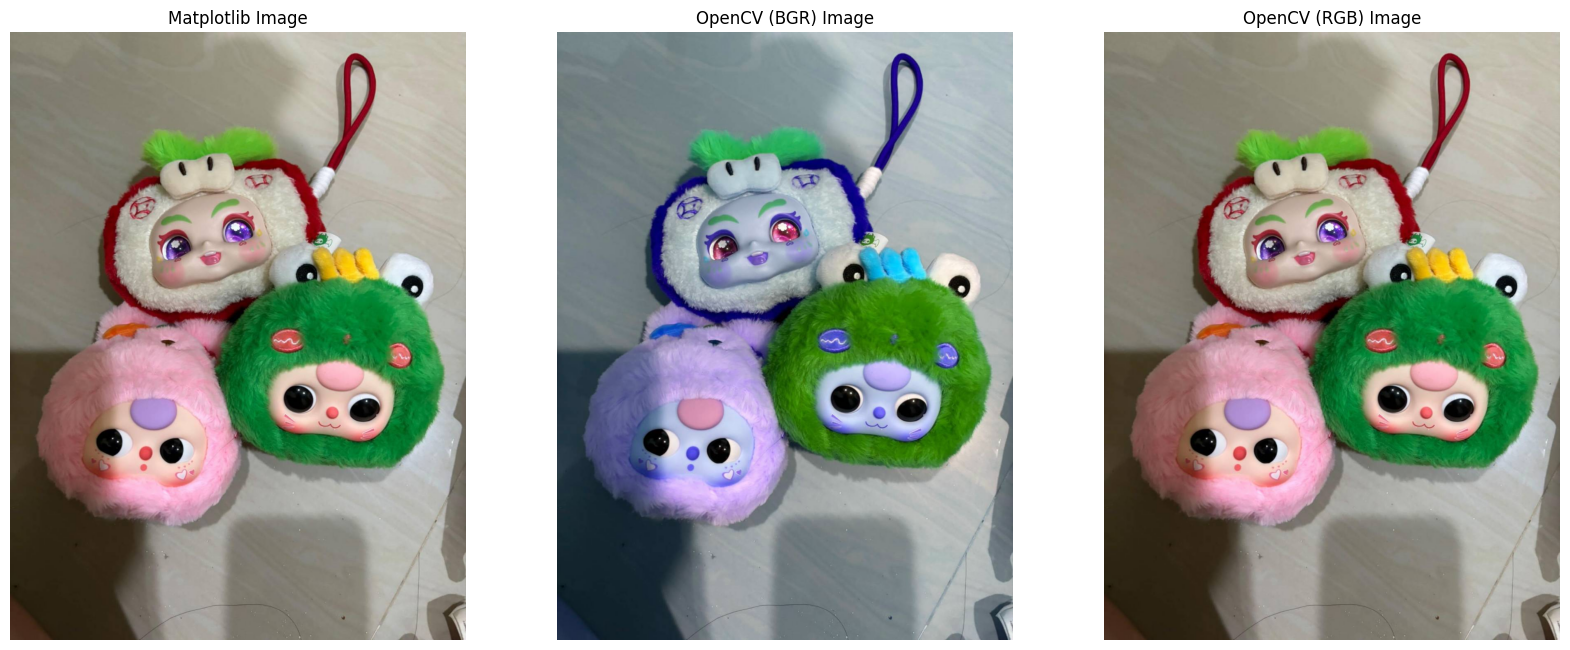

In [ ]:
## Ex การอ่านค่าจากรูปของ matplotlib กับ opencv จะมีลำดับสีที่ไม่เหมือนกัน
## matplotlib (อ่านด้วย RGB) / opencv (อ่านด้วย BGR)

### START CODE HERE ###
# load image with Matplotlib
image_matplotlib = plt.imread(img)

# load image with OpenCV (BGR)
image_opencv_bgr = cv2.imread(img)

# convert OpenCV from BGR to RGB
image_opencv_rgb = cv2.cvtColor(image_opencv_bgr, cv2.COLOR_BGR2RGB)

# display image (row, column) => return (obj ของ axs)
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# display image by Matplotlib (imshow(display image))
axs[0].imshow(image_matplotlib)
axs[0].set_title('Matplotlib Image')
axs[0].axis('off')

# display image by OpenCV (rgb)
axs[1].imshow(image_opencv_bgr)
axs[1].set_title('OpenCV (BGR) Image')
axs[1].axis('off')

# display image by OpenCV (bgr)
axs[2].imshow(image_opencv_rgb)
axs[2].set_title('OpenCV (RGB) Image')
axs[2].axis('off')

plt.show()
### END CODE HERE ###

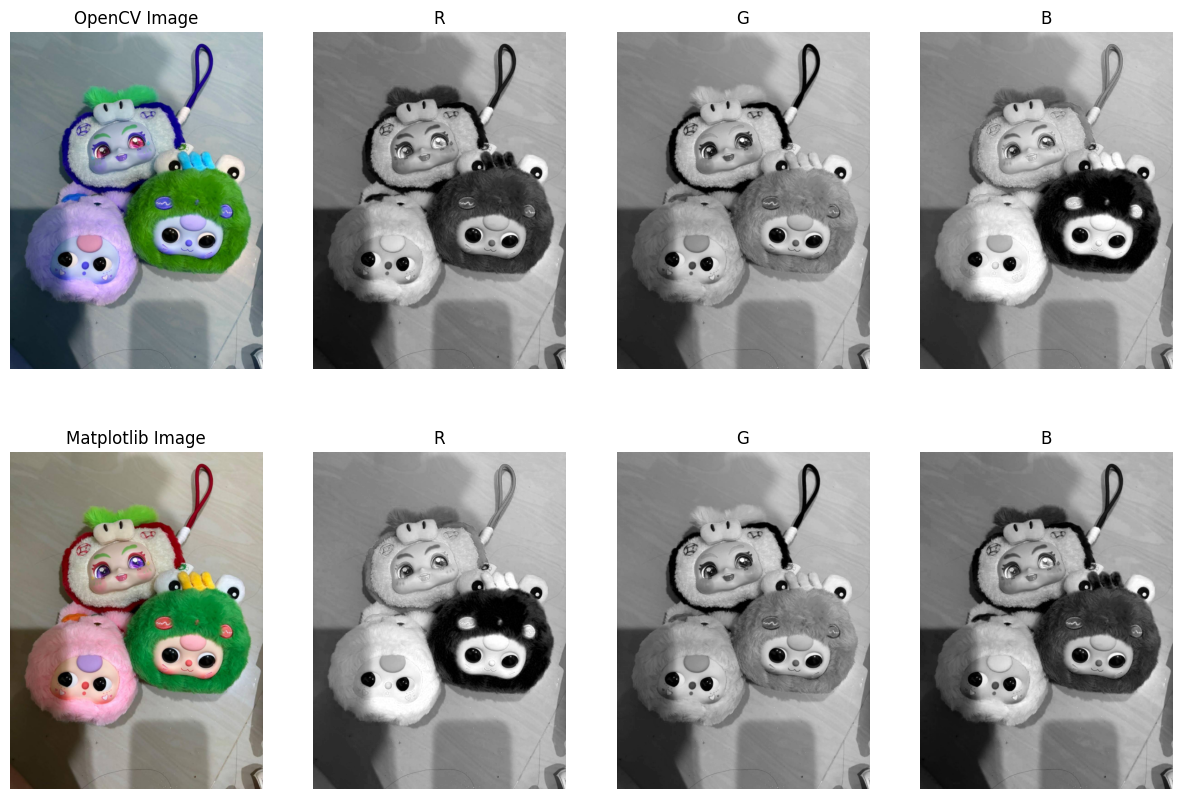

In [ ]:
## ดึงสี RGB ในรูปของ gray scale (ถ้าสีมีความเข้าใกล้สีขาวมากๆ จะมีความเป็นสีนั้นๆมากเช่นกัน)

### START CODE HERE ###
# Individual color channels with Matplotlib (R, G, B)
r_matplotlib, g_matplotlib, b_matplotlib = image_matplotlib[:,:,0], image_matplotlib[:,:,1], image_matplotlib[:,:,2]

# Individual color channels with OpenCV (ฺB, G, R)
r_opencv, g_opencv, b_opencv = image_opencv_bgr[:,:,0], image_opencv_bgr[:,:,1], image_opencv_bgr[:,:,2]

# subplot (row, column)
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

# display color channel from Matplotlib
axs[1, 0].imshow(image_matplotlib)
axs[1, 0].set_title('Matplotlib Image')
axs[1, 1].imshow(r_matplotlib, cmap = 'gray')
axs[1, 1].set_title('R')
axs[1, 2].imshow(g_matplotlib, cmap = 'gray')
axs[1, 2].set_title('G')
axs[1, 3].imshow(b_matplotlib, cmap = 'gray')
axs[1, 3].set_title('B')

# display color channel from OpenCV
axs[0, 0].imshow(image_opencv_bgr)
axs[0, 0].set_title('OpenCV Image')
axs[0, 1].imshow(r_opencv, cmap = 'gray')
axs[0, 1].set_title('R')
axs[0, 2].imshow(g_opencv, cmap = 'gray')
axs[0, 2].set_title('G')
axs[0, 3].imshow(b_opencv, cmap = 'gray')
axs[0, 3].set_title('B')

# close axis
for ax in axs.flat:
    ax.axis('off')

plt.show()
### END CODE HERE ###

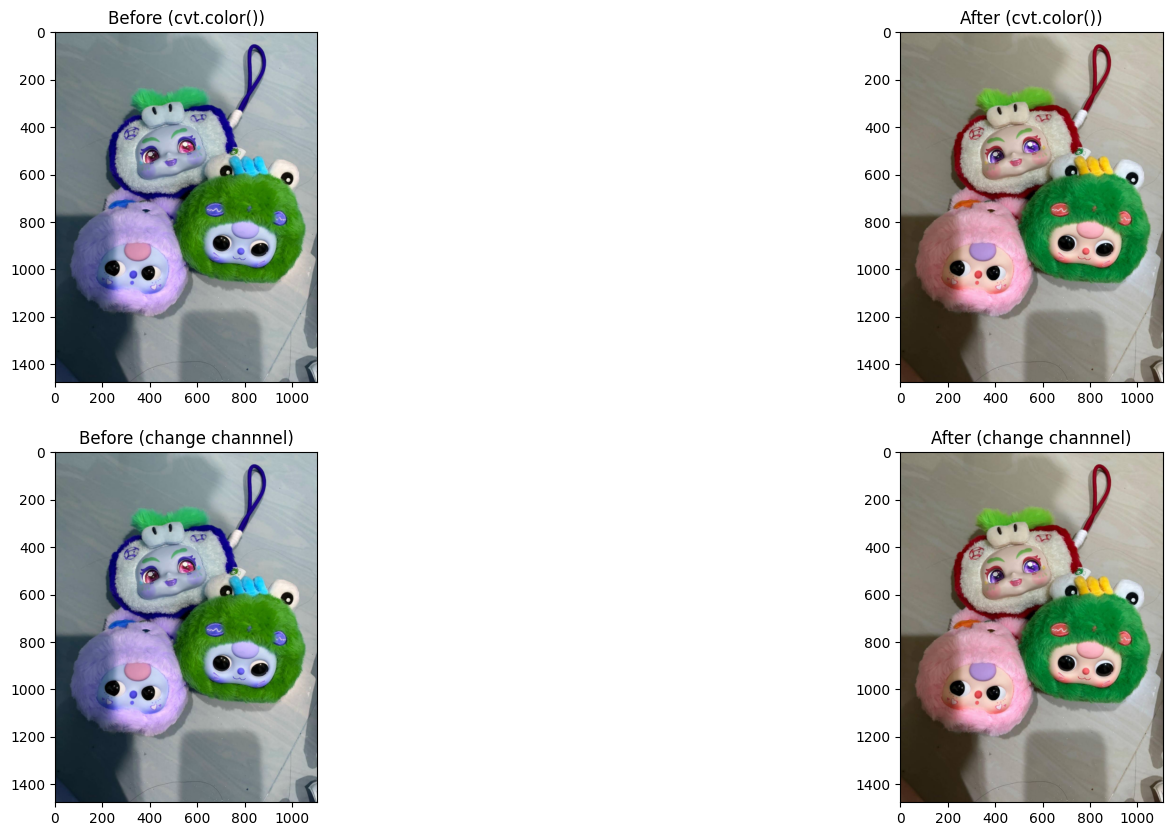

In [ ]:
## การ convert สีจาก BGR -> RGB ของ openCV ใช้ได้ 2 วิธี
# - use function cvt
# - change channel BGR to RGB

### START CODE HERE ###
# 1. use cvt.color()
image_opencv_rgb1 = cv2.cvtColor(image_opencv_bgr, cv2.COLOR_BGR2RGB)

# 2. change channel BGR to RGB
image_opencv_rgb = image_opencv_bgr[:, :, ::-1]
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# display use cvt.color()
axs[0, 0].imshow(image_opencv_bgr)
axs[0, 0].set_title("Before (cvt.color())")
axs[0, 0].axis("on")

axs[0, 1].imshow(image_opencv_rgb1)
axs[0, 1].set_title("After (cvt.color())")
axs[0, 1].axis("on")

# display change channel BGR to RGB
axs[1, 0].imshow(image_opencv_bgr)
axs[1, 0].set_title("Before (change channnel)")
axs[1, 0].axis("on")

axs[1, 1].imshow(image_opencv_rgb)
axs[1, 1].set_title("After (change channnel)")
axs[1, 1].axis("on")
plt.show()
### END CODE HERE ###

np.transpose(img) => Before : (1477, 1108, 3) | After : (3, 1108, 1477)
np.transpose(img, (2, 0, 1)) => Before : (1477, 1108, 3) | After : (3, 1477, 1108)


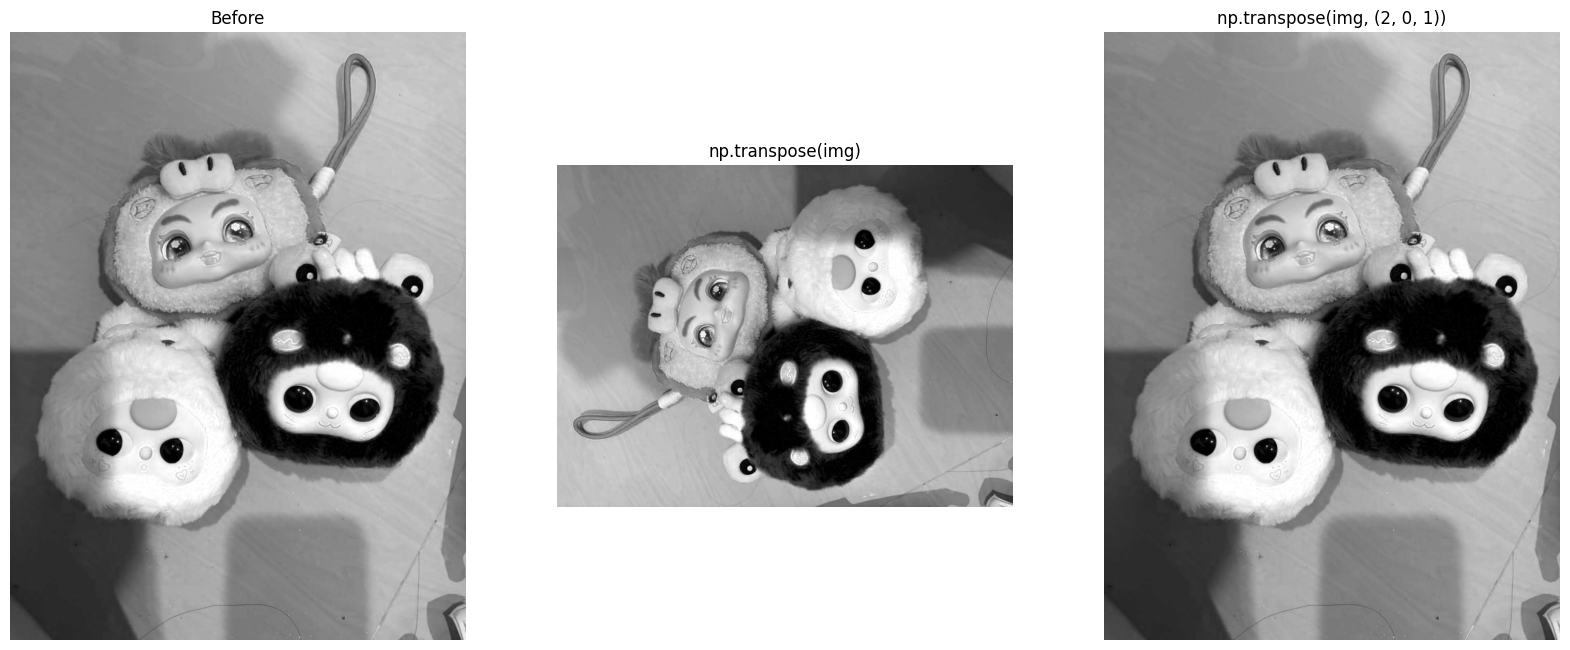

In [ ]:
## Image transpose and reshape

## Image transpose
# โดยปกติแล้วนั้น shape ของรูปภาพจะเป็น HWC
# การ transpose จะแปลงจาก HWC -> CHW

### START CODE HERE ###
# Transpose without specifying axes (HWC - > CWH) transpose แบบค่า default
transposed_img = np.transpose(image_matplotlib)

# Transpose with specifying axes (CHW format) (HWC->CHW) transpose แบบค่า กำหนดได้
transposed_img_chw = np.transpose(image_matplotlib, (2, 0, 1))

# Display the shapes before and after transposition
print(f"np.transpose(img) => Before : {image_matplotlib.shape} | After : {transposed_img.shape}")
print(f"np.transpose(img, (2, 0, 1)) => Before : {image_matplotlib.shape} | After : {transposed_img_chw.shape}")

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(image_matplotlib[:, :, 0], cmap = 'gray' )
axs[0].set_title("Before")
axs[0].axis('off')

# การใช้ imshow (channel ต้องอยู่ในแกนที่ 3 เสมอ )
axs[1].imshow(np.transpose(transposed_img, (1, 2, 0))[:, :, 0], cmap = 'gray')
axs[1].set_title("np.transpose(img)")
axs[1].axis('off')

# Display the image after transposing to CHW format
axs[2].imshow(np.transpose(transposed_img_chw, (1, 2, 0))[:, :, 0], cmap = 'gray')
axs[2].set_title("np.transpose(img, (2, 0, 1))")
axs[2].axis('off')

plt.show()
### END CODE HERE ###

Before : (1477, 1108, 3) | After : (3, 1477, 1108)


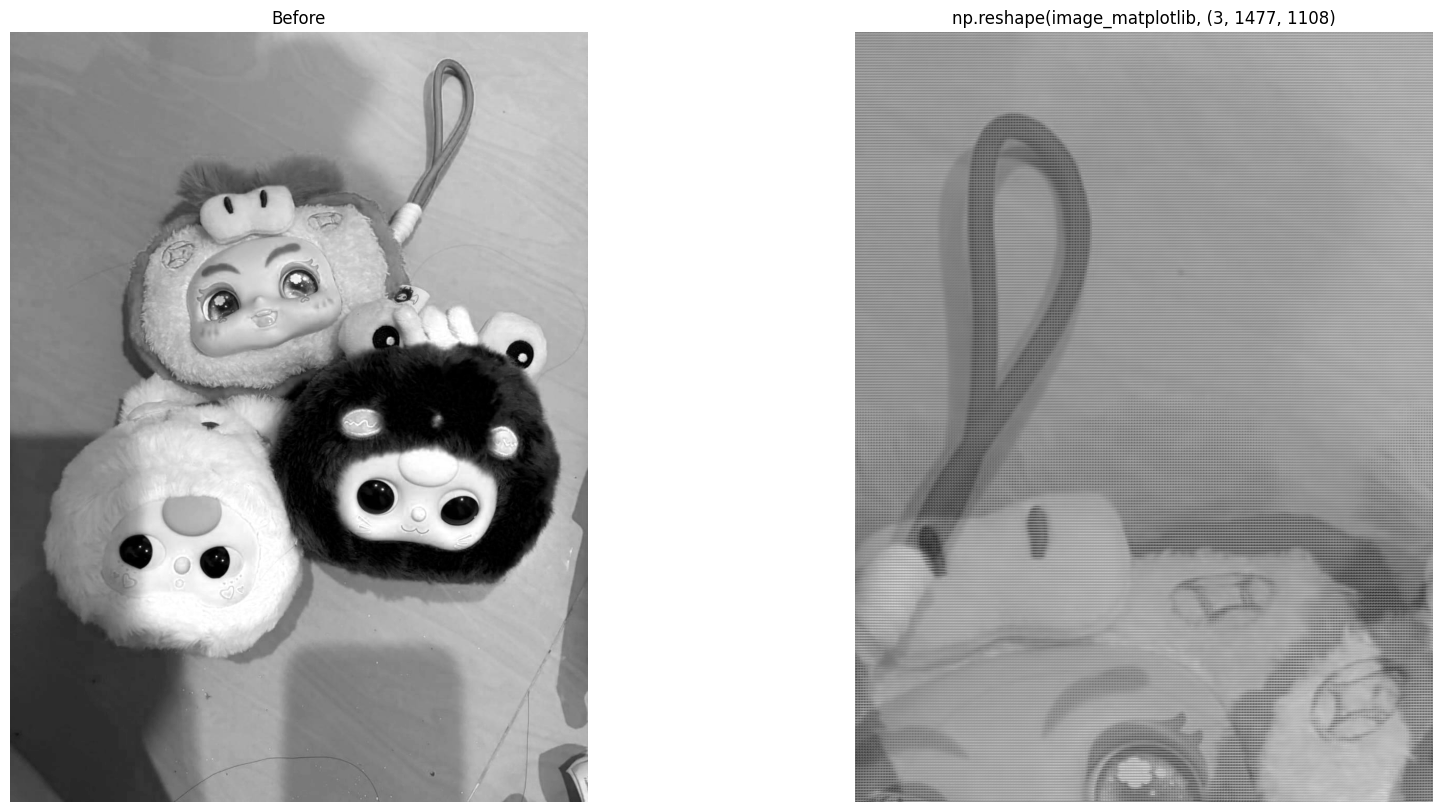

In [ ]:
## Image reshape (เปลี่ยนรูปทรงตามที่ต้องการ) (การ reshape นั้นจะทำให้เราได้โครงสร้าง array นั้นตามที่ต้องการ แต่ข้อมูลนั้นอาจะมีการสลับตำแหน่งได้)
## H(1477), W(1108), C(3)

### START CODE HERE ###
img_reshape = np.reshape(image_matplotlib, (3, 1477, 1108))
print(f"Before : {image_matplotlib.shape} | After : {img_reshape.shape}")

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(image_matplotlib[:, :,0], cmap = 'gray')
axs[0].set_title("Before")
axs[0].axis('off')

axs[1].imshow(np.transpose(img_reshape, (1, 2, 0))[:, :, 0], cmap = 'gray')
axs[1].set_title("np.reshape(image_matplotlib, (3, 1477, 1108)")
axs[1].axis('off')

plt.show()
### END CODE HERE ###

Before : (1477, 1108, 3) | After : (3, 1477, 1108)


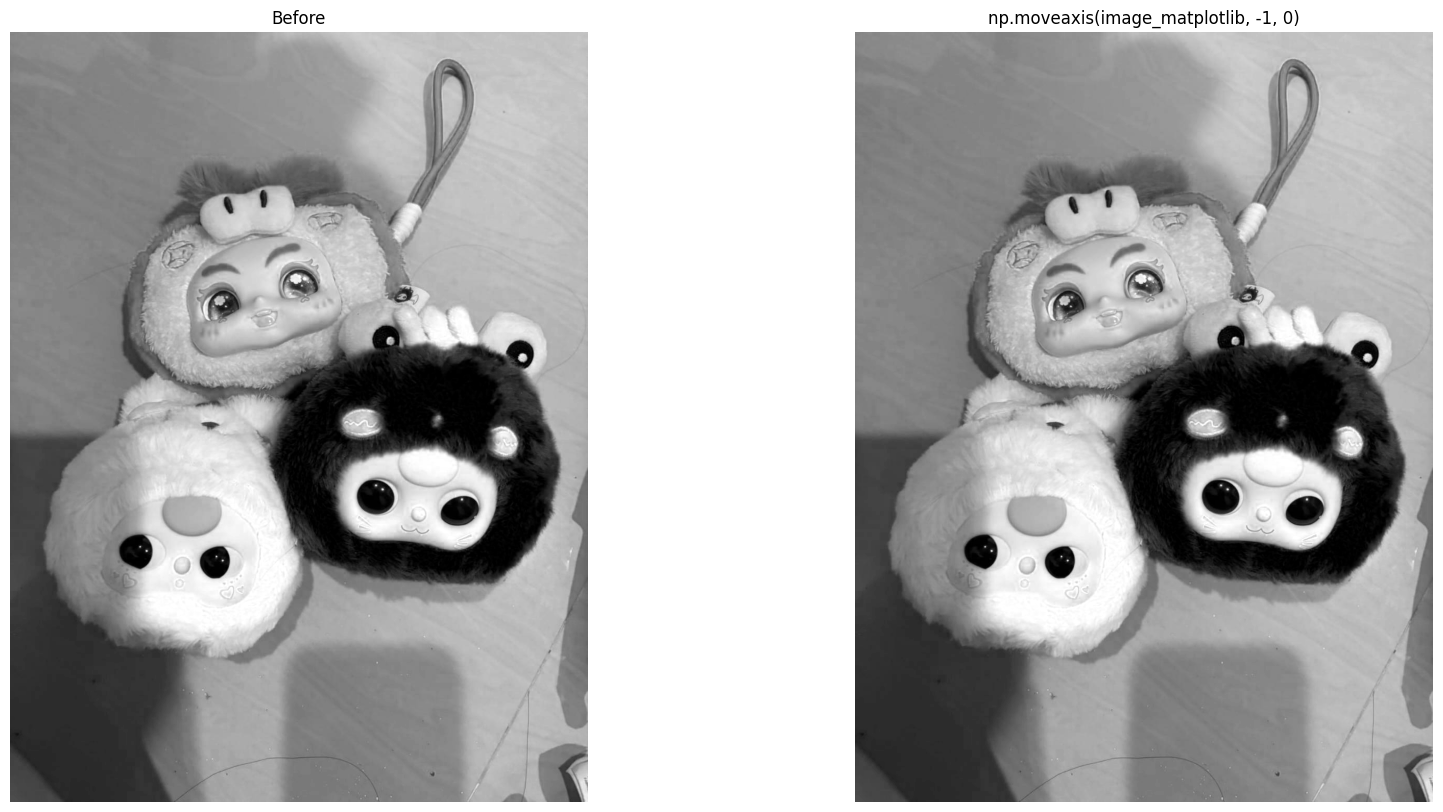

In [ ]:
## การย้ายแกนใช้ moveaxis ดีกว่า reshape

### START CODE HERE ###
# Move the channels axis from last position to first
# (move แกน -1 ไปยัง 0) (HWC -> CHW)
img_moveaxis = np.moveaxis(image_matplotlib, -1, 0)

# Print the shapes before and after moving axis
print(f"Before : {image_matplotlib.shape} | After : {img_moveaxis.shape}")

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(image_matplotlib[:, :, 0], cmap = 'gray')
axs[0].set_title("Before")
axs[0].axis('off')

axs[1].imshow(np.transpose(img_moveaxis, (1, 2, 0))[:, :, 0], cmap = 'gray')
axs[1].set_title("np.moveaxis(image_matplotlib, -1, 0)")
axs[1].axis('off')

# axs[2].imshow(img_moveaxis)

plt.show()

### END CODE HERE ###

[[132 132 132 ... 195 195 195]
 [134 134 134 ... 196 196 196]
 [135 135 135 ... 196 196 196]
 ...
 [ 76  76  76 ... 236 236 236]
 [ 76  76  76 ... 236 236 236]
 [ 76  76  76 ... 236 236 236]]
[[32 32 32 ... 48 48 48]
 [33 33 33 ... 48 48 48]
 [33 33 33 ... 48 48 48]
 ...
 [18 18 18 ... 58 58 58]
 [18 18 18 ... 58 58 58]
 [18 18 18 ... 58 58 58]]
[[ 7  7  7 ... 11 11 11]
 [ 7  7  7 ... 11 11 11]
 [ 7  7  7 ... 11 11 11]
 ...
 [ 4  4  4 ... 13 13 13]
 [ 4  4  4 ... 13 13 13]
 [ 4  4  4 ... 13 13 13]]
[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


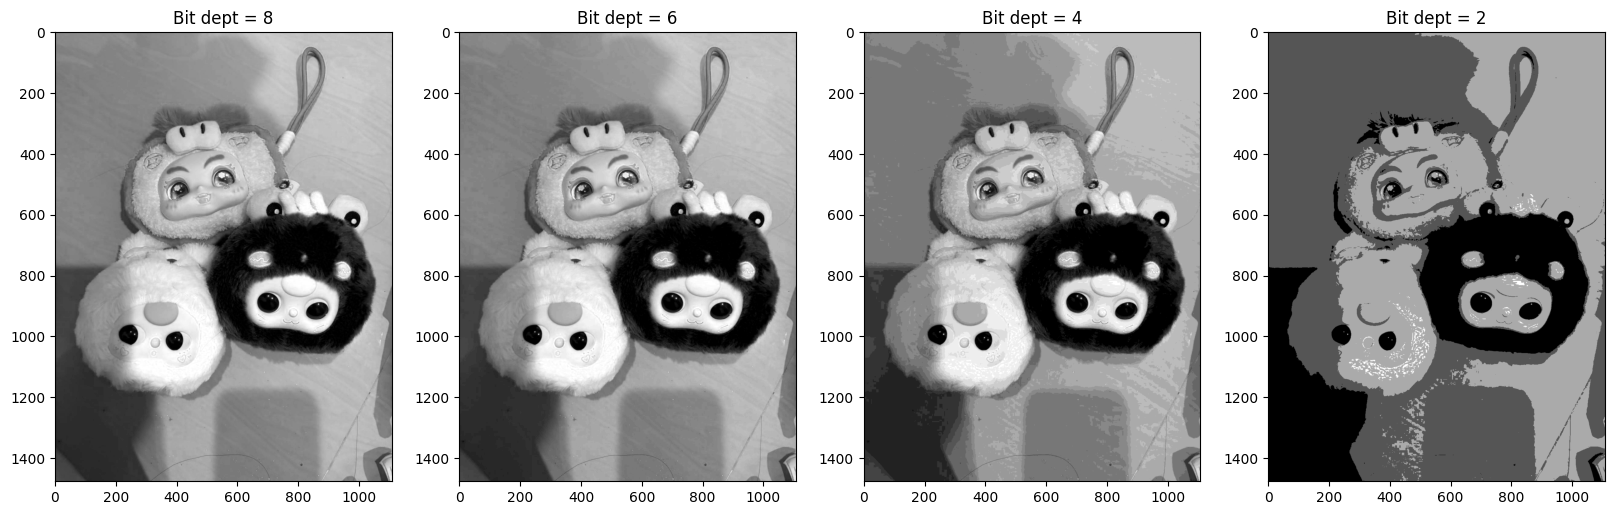

In [ ]:
### START CODE HERE ###
r_img = image_matplotlib[:,:,0]
def reduce_bit_dept(data, bit_d):
  # normalize
  norm_data = (data - np.min(data))/(np.max(data)-np.min(data))
  # scale
  scale = (2**bit_d) - 1
  # quantization (แปลงให้อยู่ในรูปของ normalize)
  quan_data = (np.floor(norm_data*scale)).astype("uint8")
  print(quan_data)
  return quan_data

fig, axs = plt.subplots(1, 4, figsize=(20, 10))
for i in range(4):
  axs[i].imshow(reduce_bit_dept(r_img, (8-(2*i))), cmap = "gray")
  axs[i].set_title(f"Bit dept = {8-(2*i)}")
  axs[i].axis
### END CODE HERE ###

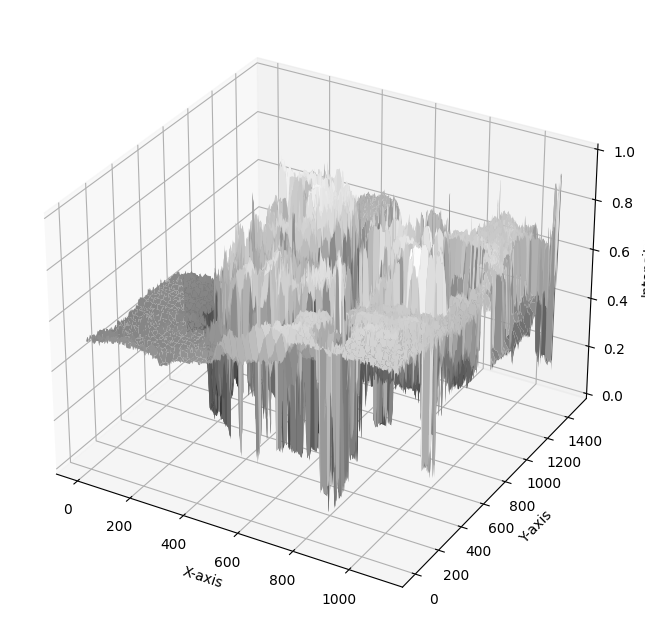

In [ ]:
### START CODE HERE ###
image_path = '/content/babythreeAndKimmon.jpg'

# Read the image in BGR format
image_opencv_bgr = cv2.imread(image_path)

# Convert the image to grayscale
cv_img_gray = cv2.cvtColor(image_opencv_bgr, cv2.COLOR_BGR2GRAY)

# Normalize the image intensity
image_normalized = cv_img_gray / 255.0

# X-axis, Y-axis
x = np.arange(cv_img_gray.shape[1])
y = np.arange(cv_img_gray.shape[0])
# สร้าง พิกัดในรูปของคู่อันดับ (x,y)
# Ex (พื้นที่ 2 *3 : สร้างออกมาเป็นคู่อันดับ (x,y) ได้ 6 คู่อันดับ)
x, y = np.meshgrid(x, y)

# Create a figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, image_normalized, cmap='gray')

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Intensity')

# Show the plot
plt.show()

### END CODE HERE ###